In [1]:
#! pip install Geopandas

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path


import seaborn as sns
from scipy import stats

In [2]:
dir_name = r'C:\Users\vasan\OneDrive\EmissionsDatathon\Zeroing Methane Emissions - Dataset'
filename_suffix = 'csv'

In [7]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_excel("datacomb.xlsx", thousands=',', skiprows = skiprows)
df.head()

,Unnamed: 0,source_id,source_lat,source_lon,source_type_y,ipcc,number_overflights,source_persistence,confidence_in_persistence,qsource,sigma_qsource,Filepath,Name,candidate_id,plume_lat,plume_lon,date,qplume,sigma_qplume,Uncern
0,0,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190922t192642-2_r4578_c217-plume.png,ang20190922t192642-2,32.212063,-103.697076,2019-09-22,2579.528100,902.732655,133.151448
1,1,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190923t163307-G_r4113_c198-plume.png,ang20190923t163307-G,32.212117,-103.697086,2019-09-23,934.430300,276.716131,736.942230
2,2,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190926t223557-D_r4139_c225-plume.png,ang20190926t223557-D,32.212162,-103.696830,2019-09-26,443.098484,152.257940,110.191596
3,3,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20191006t150453-6_r4168_c237-plume.png,ang20191006t150453-6,32.212327,-103.697526,2019-10-06,1032.395030,606.623335,244.327697
4,4,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20191007t182352-2_r4062_c150-plume.png,ang20191007t182352-2,32.212253,-103.697253,2019-10-07,826.823256,226.851094,135.781536


In [9]:
df.dtypes

Unnamed: 0                     int64
source_id                     object
source_lat                   float64
source_lon                   float64
source_type_y                 object
ipcc                          object
number_overflights             int64
source_persistence           float64
confidence_in_persistence     object
qsource                      float64
sigma_qsource                float64
Filepath                      object
Name                          object
candidate_id                  object
plume_lat                    float64
plume_lon                    float64
date                          object
qplume                       float64
sigma_qplume                 float64
Uncern                       float64
dtype: object

In [10]:
#df = df.drop_duplicates(subset='candidate_id', keep="first")

In [11]:
df.shape

(6062, 20)

In [12]:
#countries = gpd.read_file(
#               gpd.datasets.get_path("naturalearth_lowres"))
#countries.head()

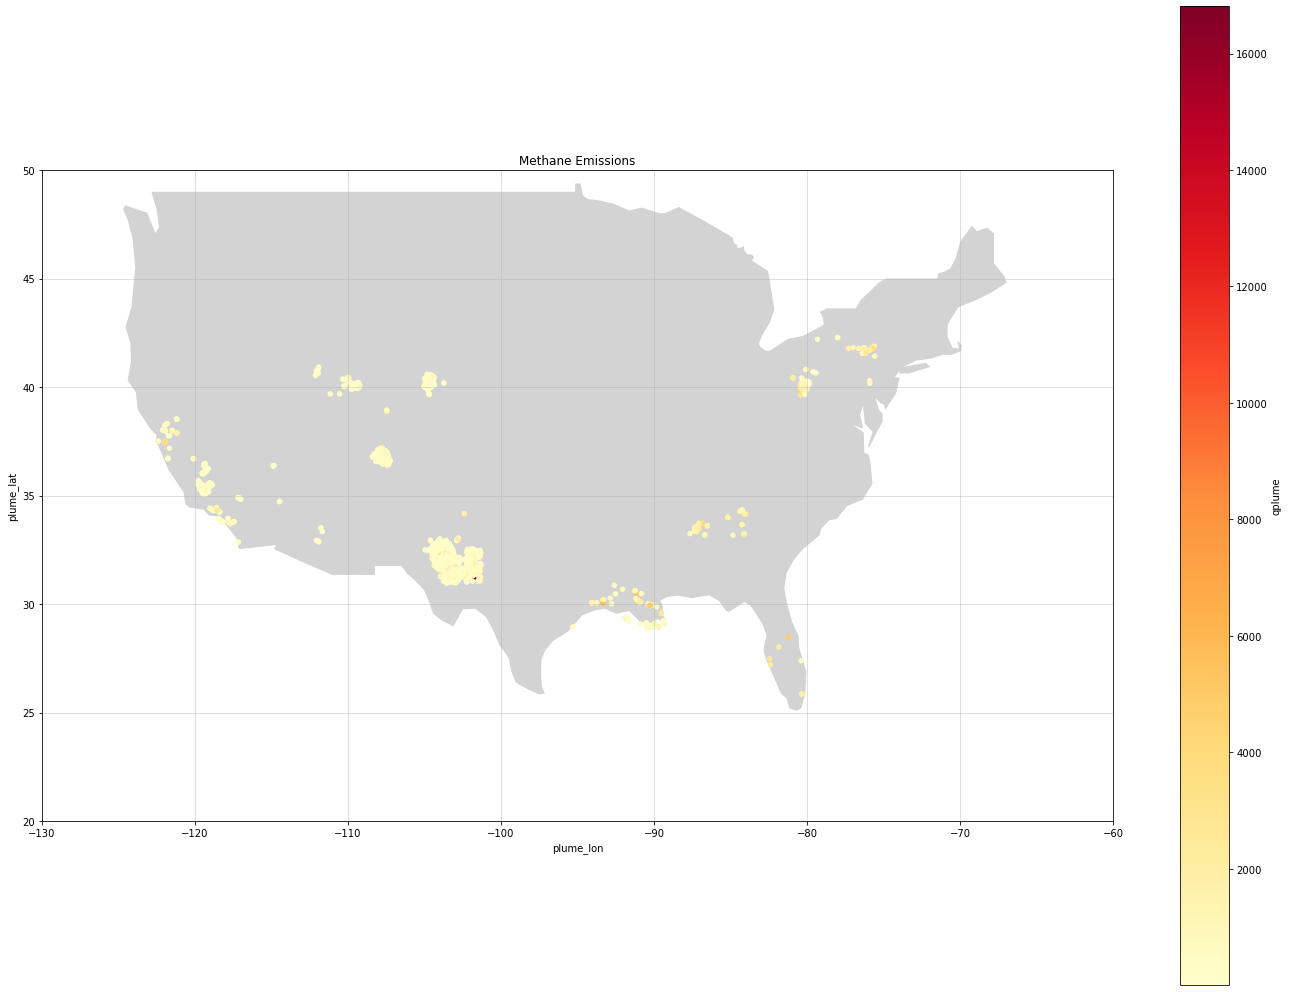

In [23]:
# initialize an axis
fig, ax = plt.subplots(figsize=(24,18))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey",
                                                 ax=ax)
# plot points
df.plot(x="plume_lon", y="plume_lat", kind="scatter", 
        c="qplume", colormap="YlOrRd", 
        title="Methane Emissions", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)

plt.xlim([-130, -60])
plt.ylim([20, 50])
#plt.show()
plt.savefig("methane_emissions.png", dpi=300, bbox_inches='tight')

In [21]:
df['qplume'] = pd.to_numeric(df['qplume'], errors='coerce')

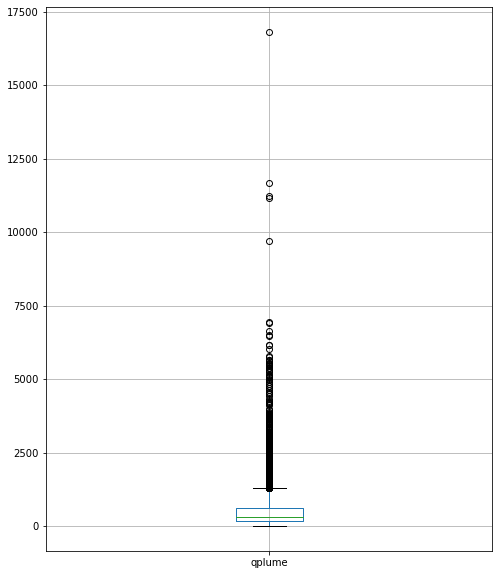

In [29]:
fig, ax = plt.subplots(figsize=(8, 10))
bxplot = df.boxplot(column = 'qplume')
bxplot.plot()
plt.show()

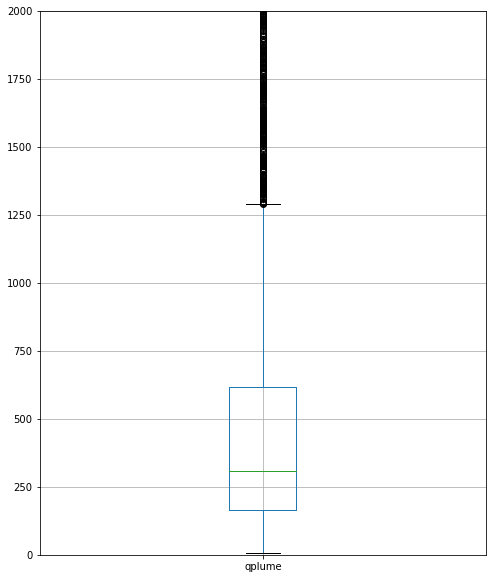

In [35]:
fig, ax = plt.subplots(figsize=(8, 10))
bxplot = df.boxplot(column='qplume', ax=ax)
ax.set_ylim(0, 2000)  # Set the y-axis limits
plt.show()

count     6062.000000
mean       559.042147
std        797.892685
min          8.091911
25%        166.331086
50%        307.209799
75%        615.901103
max      16811.280200
Name: qplume, dtype: float64


C:\Users\vasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


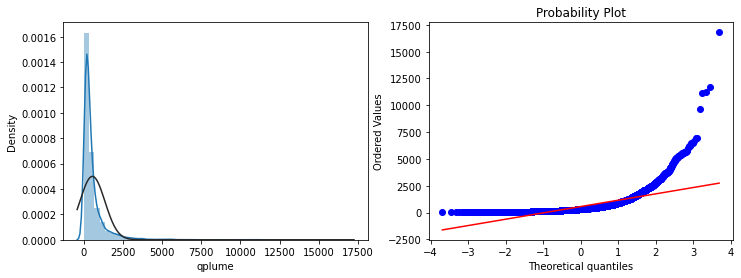

In [37]:
print(df.qplume.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df.qplume.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(df.qplume.dropna(), plot=plt)

In [39]:
dfdrop = df.loc[df['qplume'] < 1250]

count    5471.000000
mean      359.870271
std       275.405976
min         8.091911
25%       155.688259
50%       275.002742
75%       484.497310
max      1249.358960
Name: qplume, dtype: float64


C:\Users\vasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


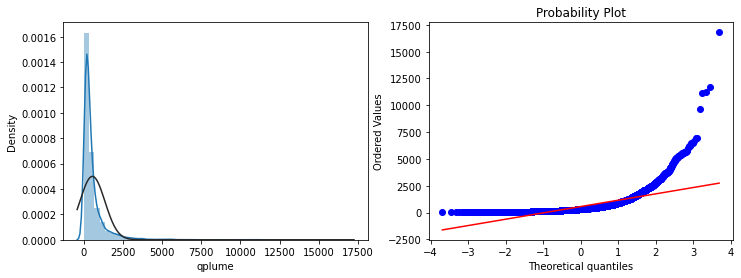

In [40]:
print(dfdrop.qplume.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df.qplume.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(df.qplume.dropna(), plot=plt)

In [41]:
dfdrop.shape

(5471, 20)

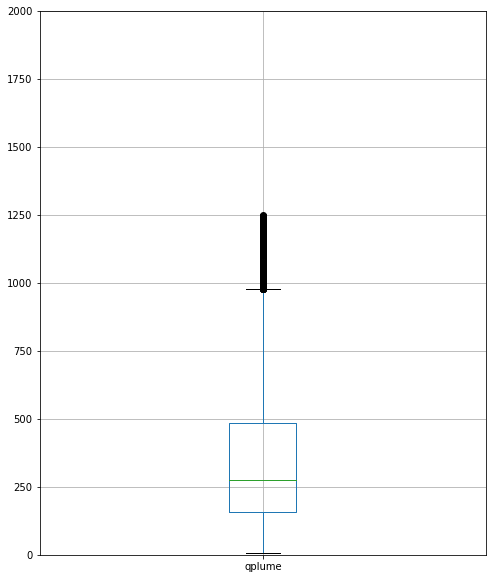

In [43]:
fig, ax = plt.subplots(figsize=(8, 10))
bxplot = dfdrop.boxplot(column='qplume', ax=ax)
ax.set_ylim(0, 2000)  # Set the y-axis limits
plt.show()

<AxesSubplot:xlabel='source_type_y', ylabel='qplume'>

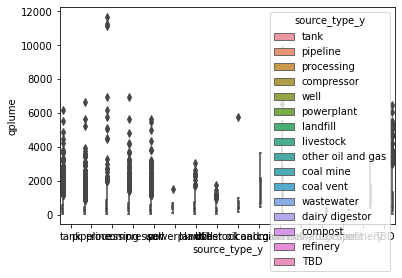

In [24]:
sns.boxplot(x = df['source_type_y'],
            y = df['qplume'],
            hue = df['source_type_y'])

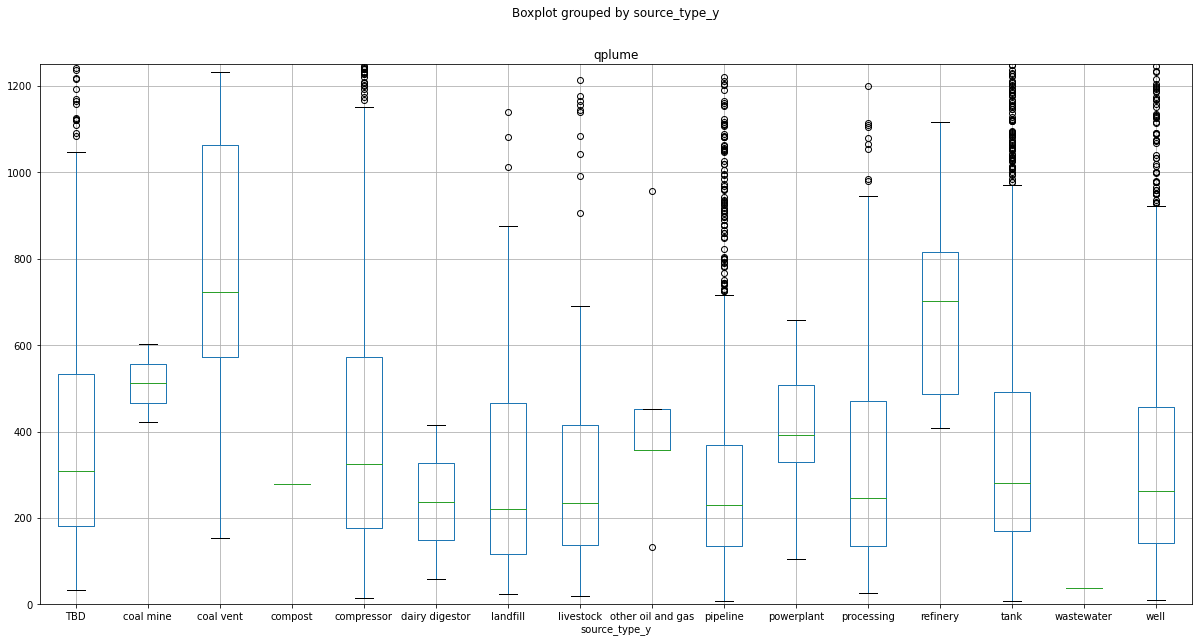

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
bxplot = dfdrop.boxplot(column='qplume', by='source_type_y', ax=ax)
ax.set_ylim(0, 1250)  # Set the y-axis limits
plt.show()

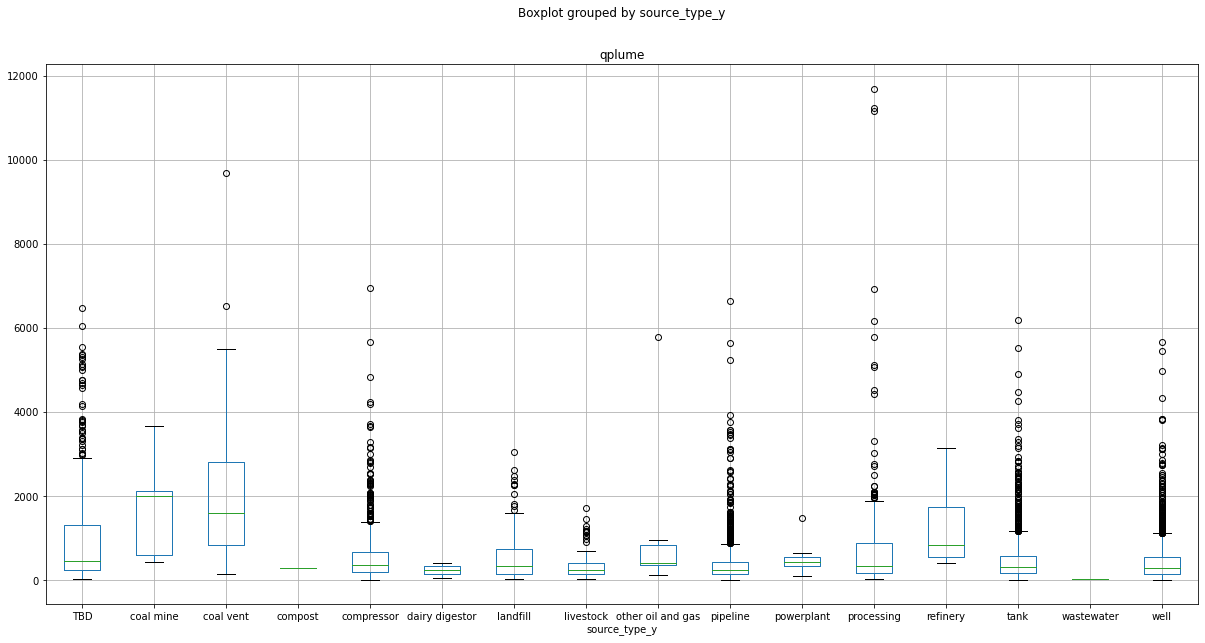

In [48]:
fig, ax = plt.subplots(figsize=(20, 10))
bxplot = df.boxplot(column='qplume', by='source_type_y', ax=ax)
#ax.set_ylim(0, 1250)  # Set the y-axis limits
plt.show()

In [49]:
grouped = df.groupby('source_type_y')['qplume']
stats = grouped.describe()
print(stats)

                    count         mean          std         min         25%  \
source_type_y                                                                 
TBD                 471.0   987.454867  1197.808357   34.281014  233.032009   
coal mine             5.0  1766.499656  1319.330258  421.154408  602.621220   
coal vent            57.0  2140.242432  1811.448173  153.349390  839.886622   
compost               1.0   279.154571          NaN  279.154571  279.154571   
compressor         1091.0   549.659038   618.339441   15.382399  187.692422   
dairy digestor        2.0   237.587530   251.880671   59.480999  148.534265   
landfill            102.0   612.746745   694.689523   23.825184  137.536157   
livestock           121.0   354.544053   338.855513   18.800433  140.382490   
other oil and gas     6.0  1338.453262  2190.332241  132.489901  357.193598   
pipeline           1105.0   422.315176   588.781391    8.354539  140.953496   
powerplant            9.0   524.219458   394.024341 

In [52]:
dftank = df.loc[df['source_type_y'] == 'tank']

In [53]:
dftank.describe()

,Unnamed: 0,source_lat,source_lon,number_overflights,source_persistence,qsource,sigma_qsource,plume_lat,plume_lon,qplume,sigma_qplume,Uncern
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1507.000000
mean,1396.275885,32.413294,-104.112666,6.204456,0.493462,240.708595,76.664240,32.413295,-104.112666,485.824125,155.227731,75.775858
std,847.088700,1.698658,4.329385,3.575711,0.300355,322.982267,94.538990,1.698658,4.329384,565.397501,164.876000,184.273817
min,0.000000,30.210840,-119.780690,1.000000,0.071429,2.697304,1.667661,30.210840,-119.780690,8.091911,4.471001,0.450500
25%,656.250000,31.782159,-104.012290,3.000000,0.250000,69.957913,22.880233,31.782159,-104.012340,176.801974,56.047297,20.528797
50%,1387.000000,32.033965,-103.793049,6.000000,0.444444,143.860064,47.441634,32.033879,-103.793014,303.639602,102.290119,37.402554
75%,2071.250000,32.244433,-103.481800,9.000000,0.714286,268.805688,88.623772,32.244340,-103.481730,572.894917,193.069117,74.151574
max,3063.000000,41.836606,-75.760363,14.000000,1.000000,3612.970880,772.075610,41.836606,-75.760363,6182.166560,1598.113895,5363.490487


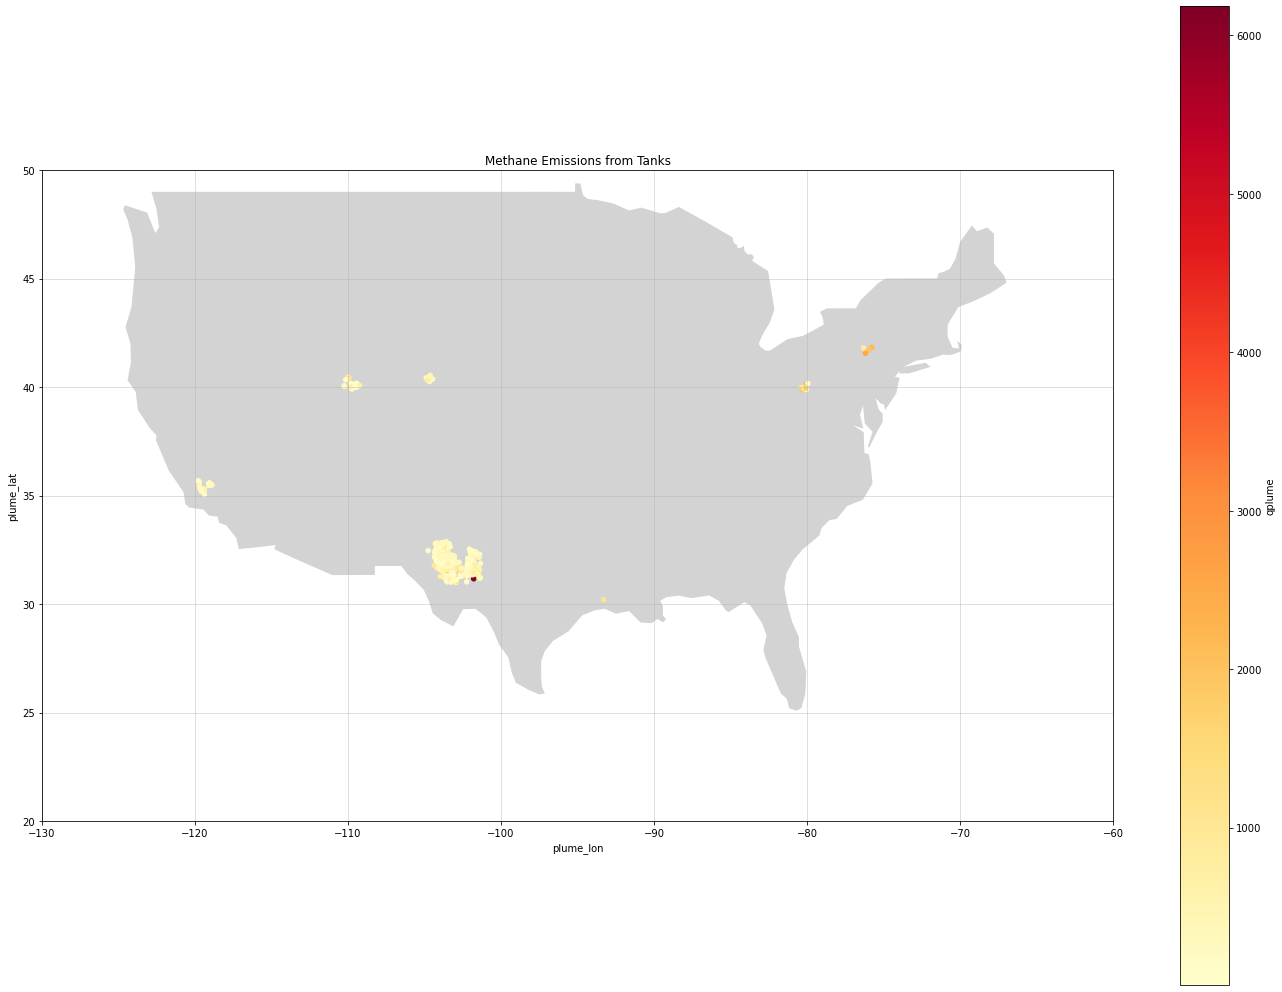

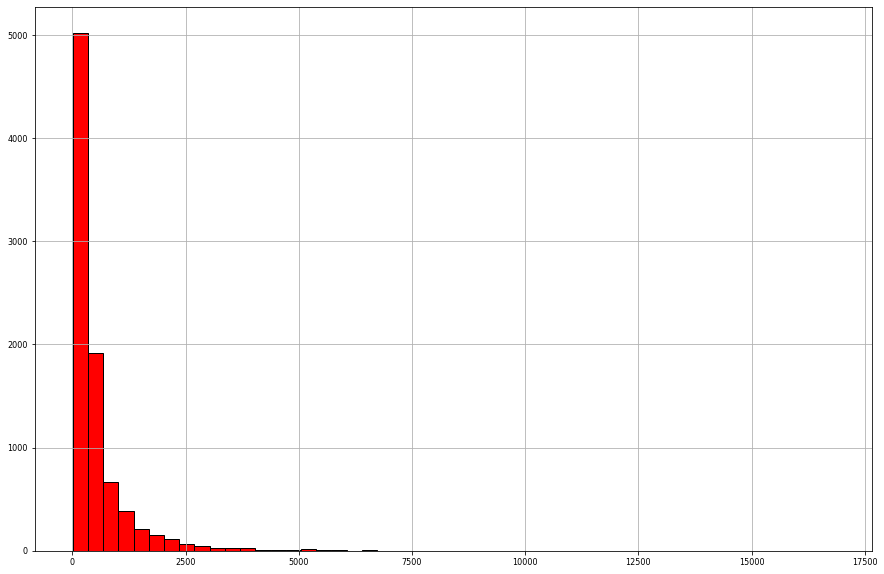

In [9]:
fig_ = df['qplume'].hist(figsize=(15, 10), bins=50, color="red",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

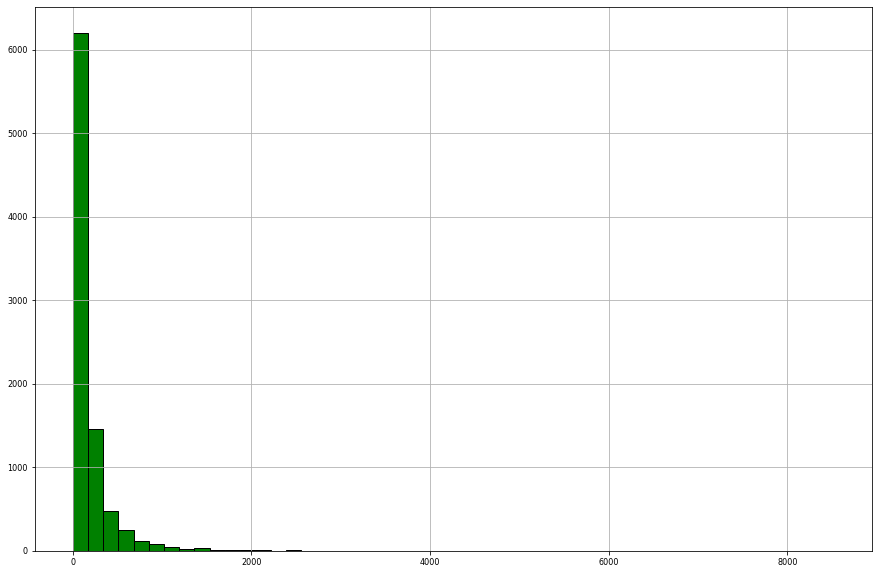

In [10]:
fig_ = df['sigma_qplume'].hist(figsize=(15, 10), bins=50, color="green",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

C:\Users\vasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


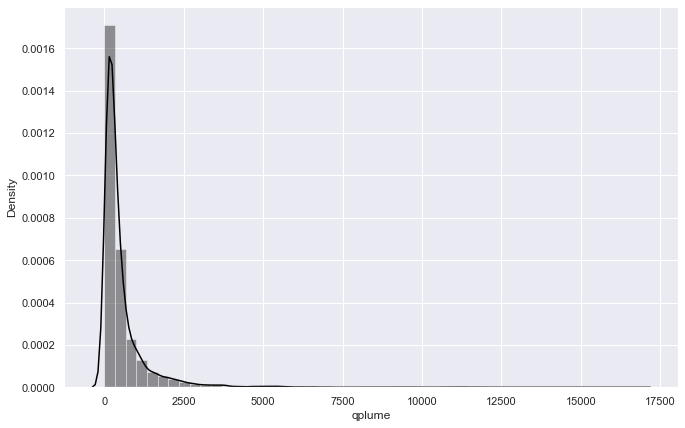

In [11]:
sns.set(rc = {"figure.figsize" : (11, 7)})
sns.distplot(df["qplume"], color = "black");

C:\Users\vasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


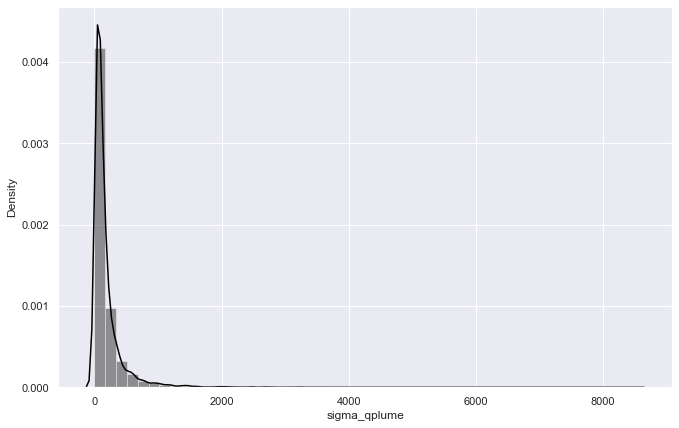

In [12]:
sns.set(rc = {"figure.figsize" : (11, 7)})
sns.distplot(df["sigma_qplume"], color = "black");

count     8735.000000
mean       532.614768
std        767.214281
min          6.597543
25%        153.238860
50%        283.575918
75%        577.069109
max      16811.280200
Name: qplume, dtype: float64


C:\Users\vasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


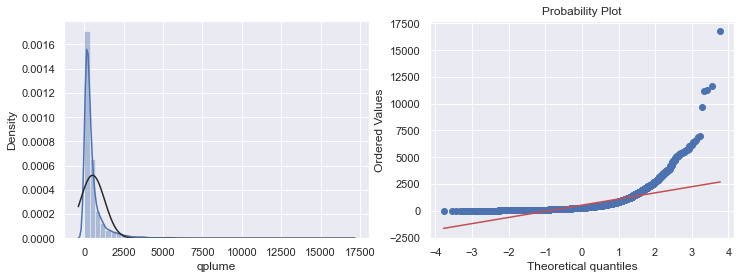

In [13]:
print(df.qplume.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df.qplume.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(df.qplume.dropna(), plot=plt)

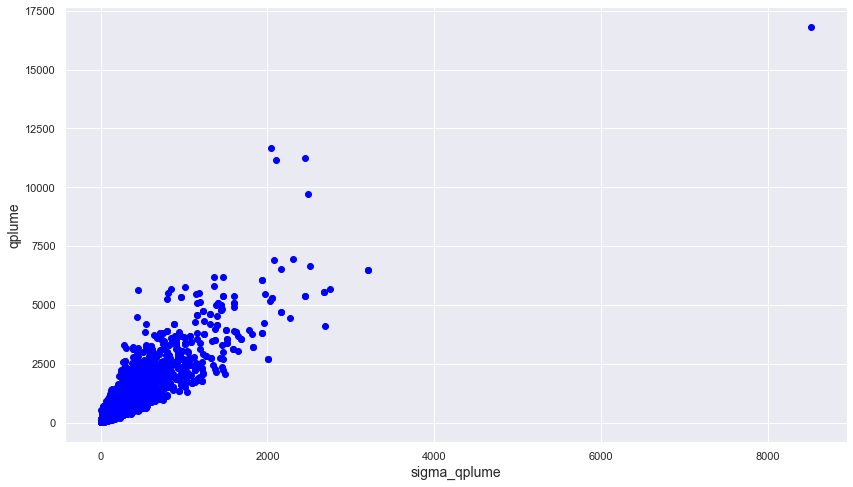

In [14]:
# Generate values for missing permeability values as a function of porosity
a = df['sigma_qplume']
b = df['qplume']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
#plt.scatter(a, b1, color='orange')
plt.xlabel("sigma_qplume", size=14)
plt.ylabel("qplume", size=14)
#plt.yscale('log', nonposy='clip')
#plt.ylim([0.01, 100000])
#plt.gca().invert_yaxis()



#plt.tight_layout()
plt.show()

In [45]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    num_outliers = np.sum(z_scores > threshold)
    return num_outliers

In [46]:
detect_outliers_zscore(df['qplume'], threshold=3)

143

In [74]:
print("Upper limit",df['qplume'].mean() + 3*df['qplume'].std())
print("Lower limit",df['qplume'].mean() - 3*df['qplume'].std())

Upper limit 2791.6822115799678
Lower limit -1740.8966820283185


In [78]:
df[(df['qplume'] > -1740.8966820283185) | (df['qplume'] <2791.6822115799678)]

,Unnamed: 0,source_id,candidate_id,plume_lat,plume_lon,date,source_type,ipcc,qplume,sigma_qplume,time_of_detection,plume_tif,rgb_tif
0,0,A0001,GAO20210712t153850p0000-A,40.586588,-104.823300,2021-07-12 00:00:00,landfill,6A Solid Waste Disposal On Land,198.690714,56.089373,NaN,NaN,NaN
1,1,A0002,GAO20210720t152559p0000-A,40.574605,-104.688130,2021-07-20 00:00:00,livestock,3A2 Manure Management,659.384534,215.976289,NaN,NaN,NaN
2,2,A0002,GAO20210712t153850p0000-B,40.574387,-104.688550,2021-07-12 00:00:00,livestock,3A2 Manure Management,458.494606,167.196121,NaN,NaN,NaN
3,3,A0002,GAO20210718t152410p0000-B,40.573827,-104.688120,2021-07-18 00:00:00,livestock,3A2 Manure Management,242.145473,140.004235,NaN,NaN,NaN
4,4,A0003,GAO20210712t153850p0000-C,40.572121,-104.688710,2021-07-12 00:00:00,livestock,3A2 Manure Management,425.330806,171.220361,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,8727,M0026,ang20220523t192554-C,35.321116,-119.630860,2022-05-23T19:25:54,NaN,NaN,52.254621,30.987699,NaN,images/ang20220523t192554-C_r5152_c150_ctr.tif,images/ang20220523t192554-C_r5152_c150_rgb.tif
8728,8728,M0027,ang20220530t185353-A,35.415291,-118.907882,2022-05-30T18:53:53,NaN,NaN,17.016561,5.035870,NaN,images/ang20220530t185353-A_r5149_c359_ctr.tif,images/ang20220530t185353-A_r5149_c359_rgb.tif
8729,8729,M0028,ang20220530t201634-A,35.432863,-119.143592,2022-05-30T20:16:34,NaN,NaN,58.744973,34.625981,NaN,images/ang20220530t201634-A_r1030_c447_ctr.tif,images/ang20220530t201634-A_r1030_c447_rgb.tif
8730,8730,M0028,ang20220530t212255-A,35.432875,-119.143537,2022-05-30T21:22:55,NaN,NaN,262.239608,116.651579,NaN,images/ang20220530t212255-A_r981_c430_ctr.tif,images/ang20220530t212255-A_r981_c430_rgb.tif


In [82]:
df2 = df[(df['qplume'] < 2791.6822115799678)]
df2.shape

(7147, 13)

In [71]:
drop_outliers_zscore(df.qplume, threshold=3)

0       198.690714
1       659.384534
2       458.494606
3       242.145473
4       425.330806
           ...    
8727     52.254621
8728     17.016561
8729     58.744973
8730    262.239608
8731     78.313758
Name: qplume, Length: 7147, dtype: float64

In [72]:
df.shape

(7292, 13)

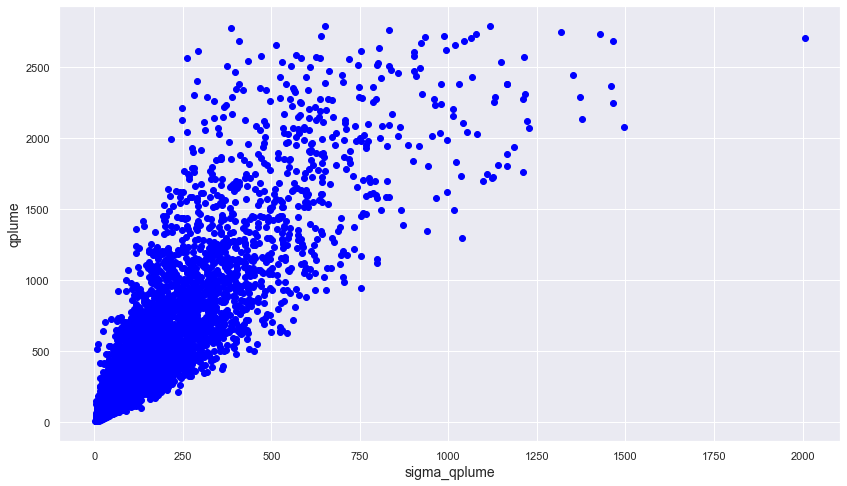

In [83]:
# Generate values for missing permeability values as a function of porosity
a = df2['sigma_qplume']
b = df2['qplume']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
#plt.scatter(a, b1, color='orange')
plt.xlabel("sigma_qplume", size=14)
plt.ylabel("qplume", size=14)
#plt.yscale('log', nonposy='clip')
#plt.ylim([0.01, 100000])
#plt.gca().invert_yaxis()



#plt.tight_layout()
plt.show()

count    7147.000000
mean      450.387594
std       474.468856
min         6.597543
25%       153.312533
50%       281.018725
75%       546.462104
max      2788.648760
Name: qplume, dtype: float64


C:\Users\vasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


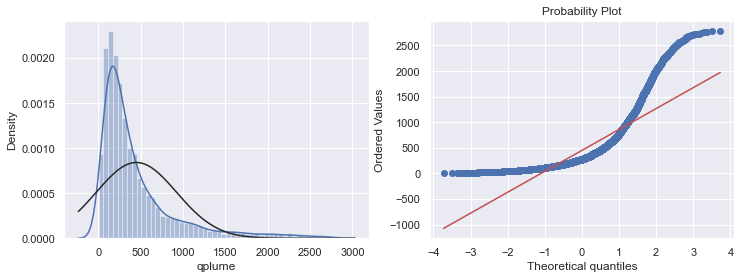

In [84]:
print(df2.qplume.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df2.qplume.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(df2.qplume.dropna(), plot=plt)

In [86]:
#References
#https://towardsdatascience.com/image-data-analysis-using-python-edddfdf128f4
#https://data-flair.training/blogs/python-remove-image-background/

In [15]:
df.shape

(8752, 13)

In [18]:
df.head()

,Unnamed: 0,source_id,candidate_id,plume_lat,plume_lon,date,source_type,ipcc,qplume,sigma_qplume,time_of_detection,plume_tif,rgb_tif
0,0,A0001,GAO20210712t153850p0000-A,40.586588,-104.82330,2021-07-12 00:00:00,landfill,6A Solid Waste Disposal On Land,198.690714,56.089373,NaN,NaN,NaN
1,1,A0002,GAO20210720t152559p0000-A,40.574605,-104.68813,2021-07-20 00:00:00,livestock,3A2 Manure Management,659.384534,215.976289,NaN,NaN,NaN
2,2,A0002,GAO20210712t153850p0000-B,40.574387,-104.68855,2021-07-12 00:00:00,livestock,3A2 Manure Management,458.494606,167.196121,NaN,NaN,NaN
3,3,A0002,GAO20210718t152410p0000-B,40.573827,-104.68812,2021-07-18 00:00:00,livestock,3A2 Manure Management,242.145473,140.004235,NaN,NaN,NaN
4,4,A0003,GAO20210712t153850p0000-C,40.572121,-104.68871,2021-07-12 00:00:00,livestock,3A2 Manure Management,425.330806,171.220361,NaN,NaN,NaN


In [16]:
df3 = pd.read_csv("source_list_2019-2022 Jeremy Zhao.csv", thousands=',', skiprows = skiprows)
df3.head()

,Unnamed: 0,source_id,source_lat,source_lon,number_overflights,source_persistence,qsource,sigma_qsource,source_type,confidence_in_persistence
0,0,G0001,35.249160,-119.57875,7,0.142857,96.853478,33.082042,tank,high
1,1,G0002,35.082251,-119.30443,7,0.142857,5.364176,1.441589,compressor,low
2,2,G0003,35.367999,-119.68495,7,0.857143,187.200884,79.748988,pipeline,high
3,3,G0004,35.343365,-119.64244,7,0.285714,44.889285,24.739863,pipeline,high
4,4,G0005,35.359342,-119.66100,7,1.000000,880.375832,244.909184,pipeline,high


In [17]:
df3.shape

(4199, 10)

In [29]:
df3.nunique()

Unnamed: 0                   4199
source_id                    4199
source_lat                   4196
source_lon                   4167
number_overflights             14
source_persistence             53
qsource                      4198
sigma_qsource                4198
source_type                    17
confidence_in_persistence      10
dtype: int64

In [24]:
image_train = Path('C:/Users/vasan/OneDrive/EmissionsDatathon/Dataset/Data/Train2')

In [25]:
filepaths = pd.Series(list(image_train.glob(r'**/*.png')), name='Filepath').astype(str)

In [26]:
df_filepaths = filepaths.to_frame()

In [27]:
df_filepaths

,Filepath
0,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
1,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
2,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
3,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
4,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
...,...
3054,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
3055,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
3056,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
3057,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...
